In [0]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Linking Boto3 bucket with S3
client = boto3.client('s3')

#Reading Data from AWS S3 Bucket 
path = "s3://crimedataanalysis/KCPD_Crime_Data_2019.csv"
crimeData=pd.read_csv(path)
crimeData=crimeData[crimeData['Sex']!='U']
crimeData=crimeData[crimeData['Race']!='U']

In [0]:
#Splitting Reported Date into Month, Date & Year to Analyze
crimeData[['Month','Date','Year']] = crimeData.Reported_Date.apply(lambda x: pd.Series(str(x).split("/")))   

In [119]:
#Reading head of Dataset
crimeData.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location,Month,Date,Year
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,636,NE 40TH ST and N KIMBALL DR,KANSAS CITY,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN,03,19,2019
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,999,00 S WATER ST,LIBERTY,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN,03,20,2019
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,423,N OAK TRFY and NE M 152 HWY E,KANSAS CITY,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN,03,23,2019
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,115,00 W PERSHING RD,KANSAS CITY,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN,03,25,2019
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN,03,26,2019


In [120]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75792 entries, 0 to 78045
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Report_No          75792 non-null  object 
 1   Reported_Date      75792 non-null  object 
 2   Reported_Time      75792 non-null  object 
 3   From_Date          75788 non-null  object 
 4   From_Time          75792 non-null  object 
 5   To_Date            27853 non-null  object 
 6   To_Time            27724 non-null  object 
 7   Offense            75792 non-null  object 
 8   IBRS               61336 non-null  object 
 9   Description        61336 non-null  object 
 10  Beat               74156 non-null  object 
 11  Address            75792 non-null  object 
 12  City               75773 non-null  object 
 13  Zip Code           62128 non-null  float64
 14  Rep_Dist           48243 non-null  object 
 15  Area               73427 non-null  object 
 16  DVFlag             757

In [121]:
#Rows & Colunms of Data set
crimeData.shape

(75792, 26)

In [122]:
#Datatypes of Columns
crimeData.dtypes

Report_No             object
Reported_Date         object
Reported_Time         object
From_Date             object
From_Time             object
To_Date               object
To_Time               object
Offense               object
IBRS                  object
Description           object
Beat                  object
Address               object
City                  object
Zip Code             float64
Rep_Dist              object
Area                  object
DVFlag                object
Involvement           object
Race                  object
Sex                   object
Age                  float64
Firearm Used Flag       bool
Location              object
Month                 object
Date                  object
Year                  object
dtype: object

In [123]:
#Checking for null values
crimeData.isnull().sum()

Report_No                0
Reported_Date            0
Reported_Time            0
From_Date                4
From_Time                0
To_Date              47939
To_Time              48068
Offense                  0
IBRS                 14456
Description          14456
Beat                  1636
Address                  0
City                    19
Zip Code             13664
Rep_Dist             27549
Area                  2365
DVFlag                   0
Involvement              0
Race                  9423
Sex                   8248
Age                  16409
Firearm Used Flag        0
Location             13512
Month                    0
Date                     0
Year                     0
dtype: int64

In [0]:
#Dropping Rows with More than 3 Null Values
crimeData=crimeData.dropna(axis=0,thresh=20)
#Handling Missing Data
crimeData['Age']=crimeData['Age'].fillna((crimeData['Age'].mean()))
crimeData['Sex']=crimeData['Sex'].fillna((crimeData['Sex'].mode()[0]))
crimeData['Zip Code']=crimeData['Zip Code'].fillna((crimeData['Zip Code'].mode()[0]))
crimeData['Race']=crimeData['Race'].fillna((crimeData['Race'].mode()[0]))
crimeData['Beat']=crimeData['Beat'].fillna((crimeData['Beat'].mode()[0]))

In [125]:
#Checking for null values
crimeData.isnull().sum()

Report_No                0
Reported_Date            0
Reported_Time            0
From_Date                2
From_Time                0
To_Date              45897
To_Time              46024
Offense                  0
IBRS                 12996
Description          12996
Beat                     0
Address                  0
City                    15
Zip Code                 0
Rep_Dist             25875
Area                  1795
DVFlag                   0
Involvement              0
Race                     0
Sex                      0
Age                      0
Firearm Used Flag        0
Location             12550
Month                    0
Date                     0
Year                     0
dtype: int64

In [0]:
crimeData=crimeData.drop(['From_Date','From_Time','To_Date','To_Time','Rep_Dist','Report_No'],axis=1)
crimeData=crimeData.dropna()

In [127]:
#Checking for null values
crimeData.isnull().sum()

Reported_Date        0
Reported_Time        0
Offense              0
IBRS                 0
Description          0
Beat                 0
Address              0
City                 0
Zip Code             0
Area                 0
DVFlag               0
Involvement          0
Race                 0
Sex                  0
Age                  0
Firearm Used Flag    0
Location             0
Month                0
Date                 0
Year                 0
dtype: int64

In [128]:
crimeData.shape

(49594, 20)

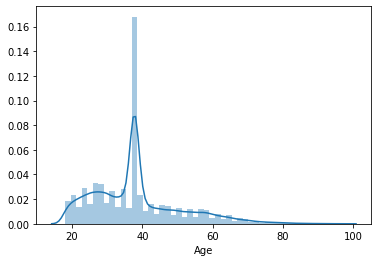

In [129]:
#Age
sns.distplot(crimeData['Age'])

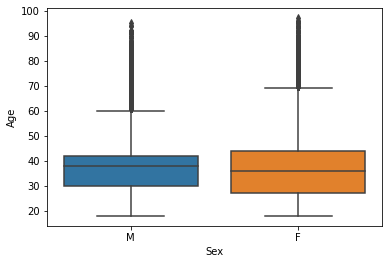

In [130]:
#Box Plot of Sex vs Age
sns.boxplot(x='Sex', y='Age', data=crimeData)

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('M', 'W'), (0.0, 0.0, 0.6234304141670164, 0.6001888737544552)),
              (('M', 'B'),
               (0.0,
                0.6035001320326009,
                0.6234304141670164,
                0.39021547848337484)),
              (('M', 'I'),
               (0.0,
                0.9970268687941214,
                0.6234304141670164,
                0.0029731312058786197)),
              (('F', 'W'),
               (0.6284055385451258,
                0.0,
                0.3715944614548743,
                0.5013818214584411)),
              (('F', 'B'),
               (0.6284055385451258,
                0.5046930797365868,
                0.3715944614548743,
                0.48856300937793556)),
              (('F', 'I'),
               (0.6284055385451258,
                0.996567347392668,
                0.3715944614548743,
                0.0034326526073320206))]))

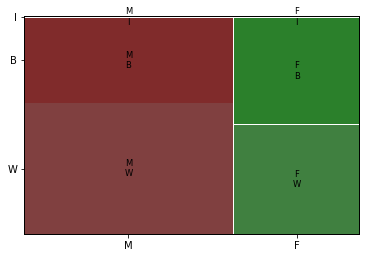

In [131]:
#Mosaic for Sex & Race 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(crimeData, ['Sex', 'Race'])

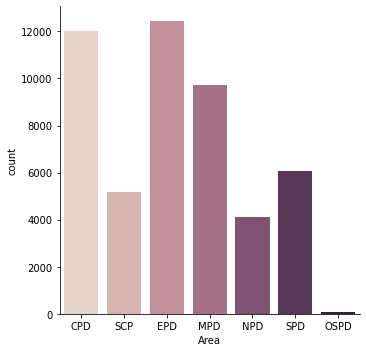

In [132]:
#Crime Data Based on the Area
sns.catplot(x="Area", kind="count", palette="ch:.10", data=crimeData);


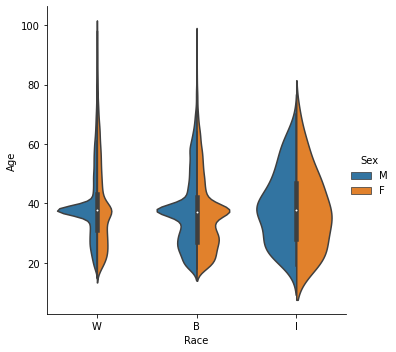

In [133]:
sns.catplot(x="Race", y="Age", hue="Sex",kind="violin", split=True, data=crimeData);

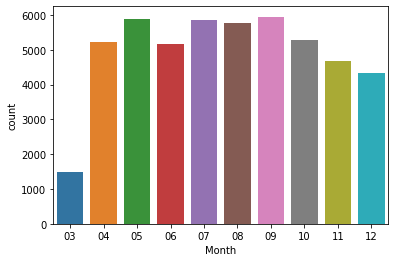

In [134]:
#Month
sns.countplot(x ='Month', data = crimeData) 



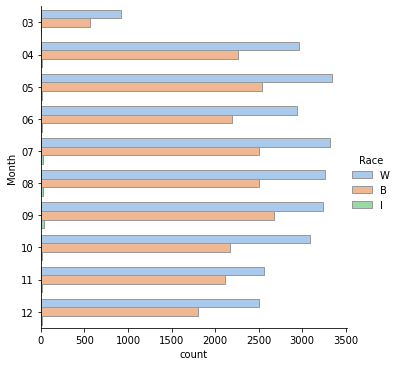

In [135]:
sns.catplot(y="Month", hue="Race", kind="count",
            palette="pastel", edgecolor=".6",
            data=crimeData);

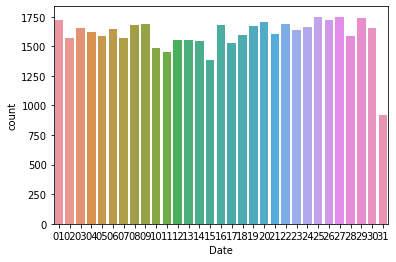

In [136]:
#Date
sns.countplot(x ='Date', data = crimeData) 

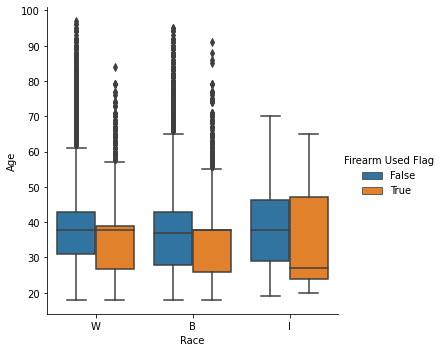

In [137]:
sns.catplot(x="Race", y="Age", hue="Firearm Used Flag", kind="box", data=crimeData);


In [138]:
#Correlation
numeric_features= crimeData.select_dtypes(include=[np.number])
corr = crimeData.corr()
print("Correlation\n",corr['Age'].sort_values(ascending=False),'\n')


Correlation
 Age                  1.00000
Zip Code            -0.00364
Firearm Used Flag   -0.07041
Name: Age, dtype: float64 



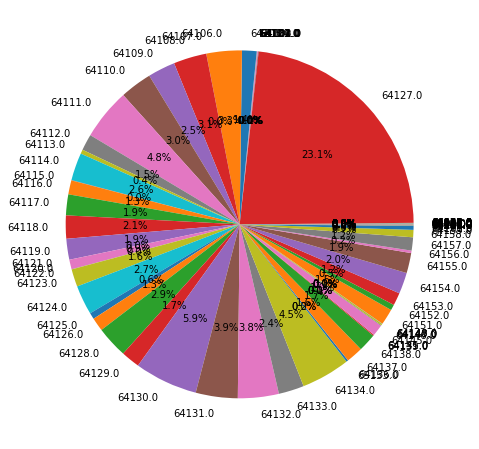

In [139]:
labels = list(set(crimeData["Zip Code"]))
counts = []
fig = plt.figure(figsize =(15, 8)) 

for label in labels:
    counts.append(np.count_nonzero(crimeData["Zip Code"] == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [140]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('popular')
stemmer = PorterStemmer()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [0]:
def process_text(value):
    no_punc=[char for char in value if char not in string.punctuation]
    new1=''.join(no_punc)
    new2=[stemmer.stem(word) for word in new1]
    new3=''.join(new2)
    return[word for word in new3.split()if word.lower()not in stopwords.words('english') ]

In [142]:
import string
crimeData['Description'].apply(process_text)

8                          [Embezzlement]
67                      [Simple, Assault]
112                 [Aggravated, Assault]
122                             [Robbery]
178                             [Robbery]
                       ...               
78038             [Motor, Vehicle, Theft]
78040    [VandalismDestruction, Property]
78042               [Aggravated, Assault]
78044        [BurglaryBreaking, Entering]
78045               [Aggravated, Assault]
Name: Description, Length: 49594, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
crimeData['Race']= le.fit_transform(crimeData['Race']) 
crimeData['Sex']= le.fit_transform(crimeData['Sex']) 
crimeData['DVFlag']= le.fit_transform(crimeData['DVFlag']) 
crimeData['Area']= le.fit_transform(crimeData['Area']) 
crimeData['IBRS']= le.fit_transform(crimeData['IBRS']) 
crimeData['Firearm Used Flag']= le.fit_transform(crimeData['Firearm Used Flag']) 



In [144]:
crimeData.head(5)

,Reported_Date,Reported_Time,Offense,IBRS,Description,Beat,Address,City,Zip Code,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location,Month,Date,Year
8,03/27/2019,10:50,Embezzlement,33,Embezzlement,134,4600 S WORNALL RD,KANSAS CITY,64112.0,0,0,VIC,2,1,37.759643,0,4600 S WORNALL RD\nKANSAS CITY 64112\n(39.043...,03,27,2019
67,04/17/2019,22:47,Assault (Non-Aggravated),11,Simple Assault,636,8200 NE UNDERGROUND DR,KANSAS CITY,64119.0,5,0,CMP VIC,2,0,20.000000,0,8200 NE UNDERGROUND DR\nKANSAS CITY 64119\n(3...,04,17,2019
112,05/06/2019,02:27,Assault (Aggravated),10,Aggravated Assault,121,400 N PARK AVE,KANSAS CITY,64127.0,0,0,VIC,2,0,26.000000,0,"400 N PARK AVE\nKANSAS CITY\n(39.117113, -94....",05,06,2019
122,05/09/2019,19:38,Robbery (Armed Street),9,Robbery,632,1400 NE VIVION ROAD,KANSAS CITY,64127.0,5,0,VIC,2,1,37.759643,1,"1400 NE VIVION ROAD\nKANSAS CITY\n(39.181063,...",05,09,2019
178,06/01/2019,23:31,Robbery (Armed Street),9,Robbery,313,3600 THOMPSON AVE,KANSAS CITY,64127.0,1,0,VIC,2,0,57.000000,1,"3600 THOMPSON AVE\nKANSAS CITY\n(39.107707, -...",06,01,2019


<Figure size 432x288 with 0 Axes>

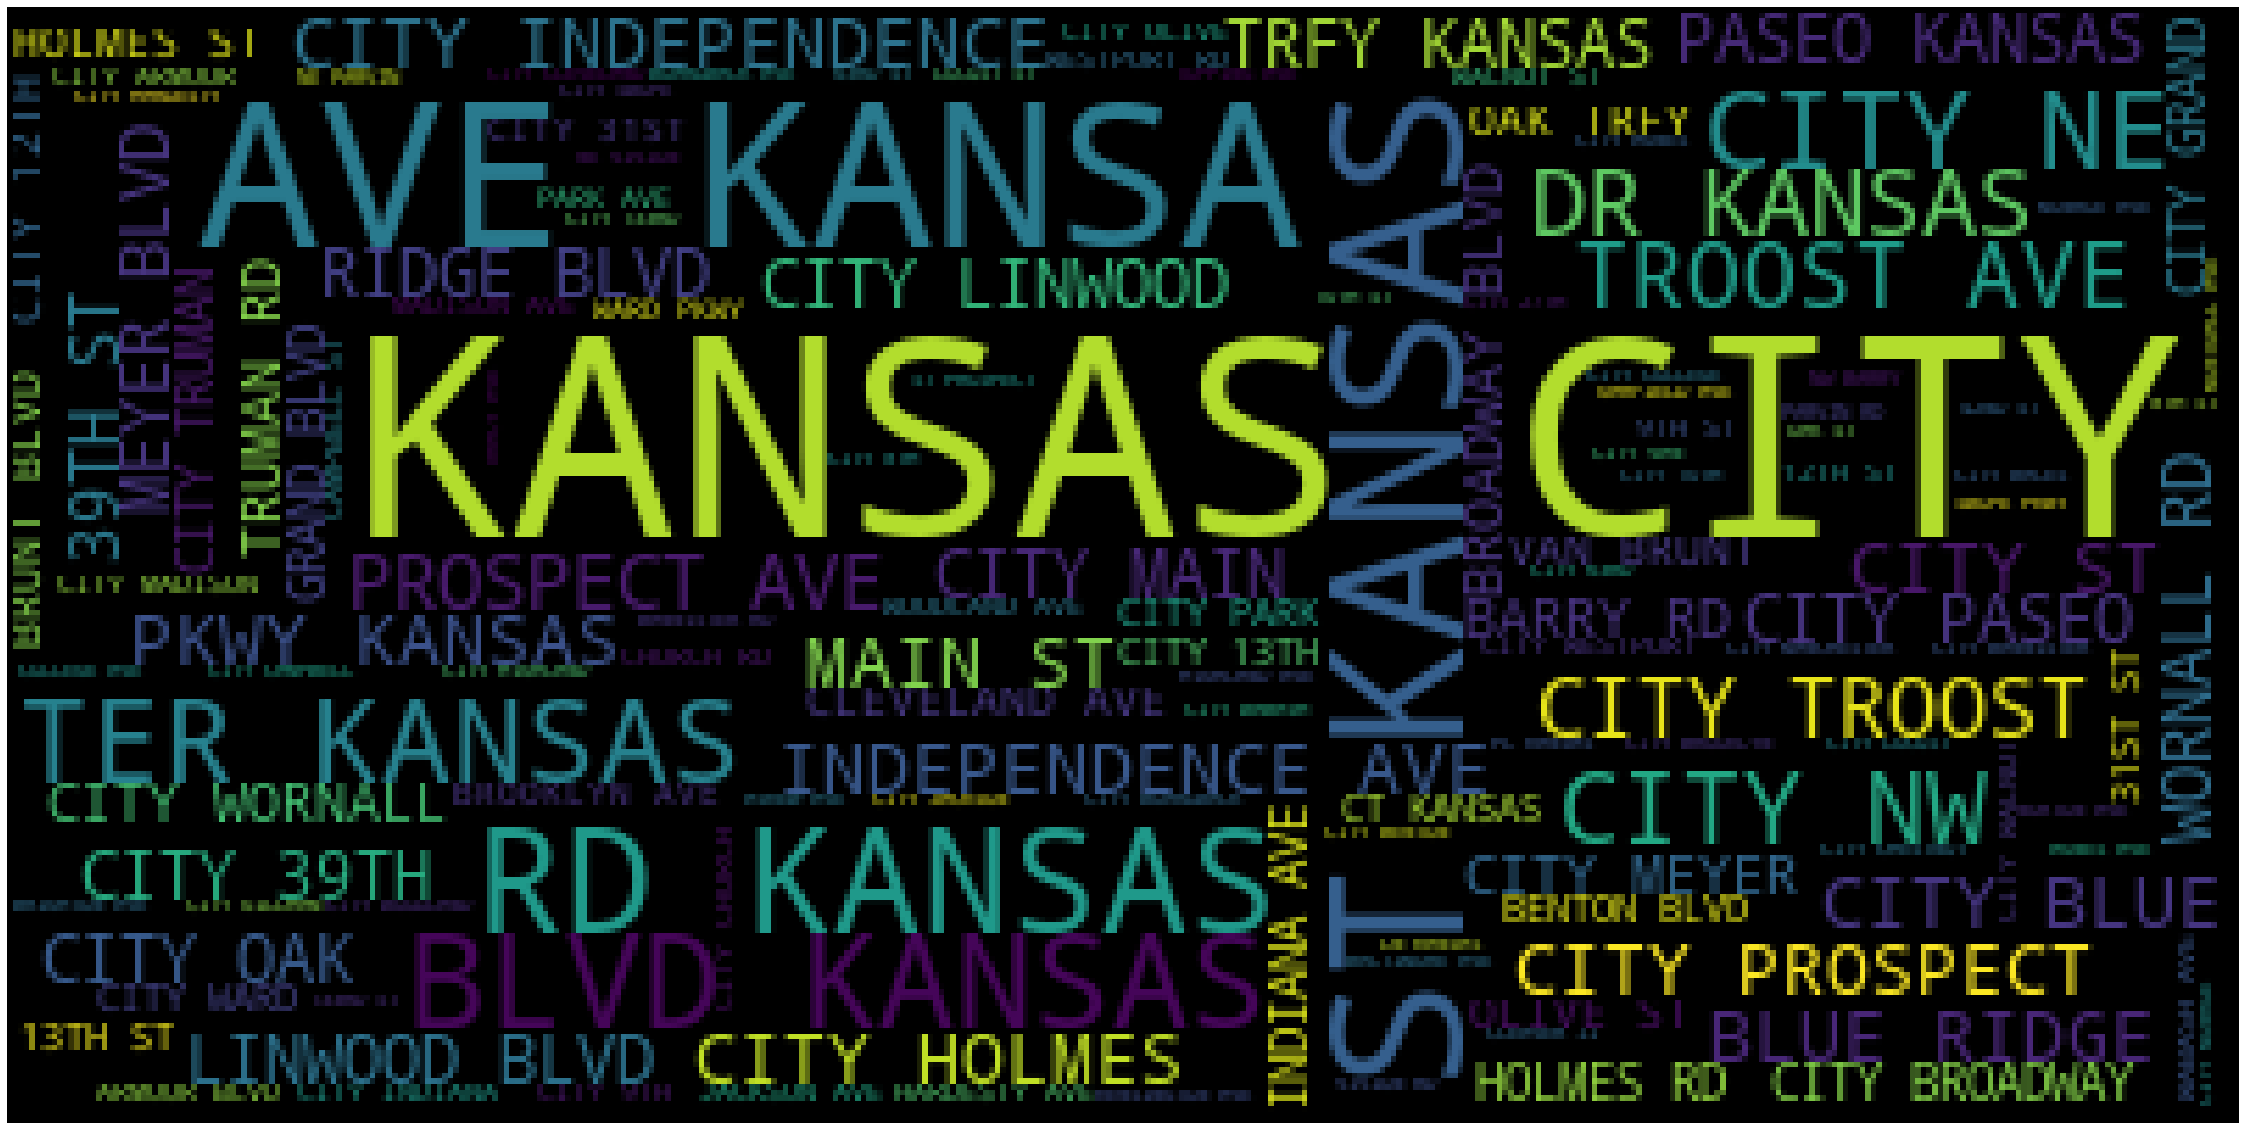

In [145]:
from wordcloud import WordCloud
train_text = " ".join(crimeData["Location"])
wordcloud = WordCloud().generate(train_text)
plt.figure()
plt.subplots(figsize=(40,40))
wordcloud = WordCloud(
    background_color="Black",
    max_words=len(train_text),
    max_font_size=50,
    relative_scaling=.4).generate(train_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
c_vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

In [147]:
c_vectorizer.fit(iter(crimeData["Description"]))
crimeData["Description"] = c_vectorizer.transform(iter(crimeData["Description"]))
#crimeData["Description"] = c_vectorizer.transform(iter(crimeData["Description"]))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
X = crimeData.iloc[:,[9,10,12,13,14,17]].values
y = crimeData.iloc[:,[15]].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
#X_train = np.array(X_train)
#X_test = np.array(X_test).reshape(-1, 1)
dtc_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dtc_pred=dtc_model.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, dtc_pred)
print(cm)
accuracy_score(y_test, dtc_pred)

[[14400   508]
 [ 1345   114]]


0.8867843832101179

In [197]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14908
           1       0.18      0.08      0.11      1459

    accuracy                           0.89     16367
   macro avg       0.55      0.52      0.52     16367
weighted avg       0.85      0.89      0.87     16367



In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rf_pred)
print(cm)
accuracy_score(y_test, rf_pred)

[[14407   501]
 [ 1325   134]]


0.8884340441131545

In [157]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.47      0.27      0.34      6101
           1       0.65      0.82      0.73     10266

    accuracy                           0.61     16367
   macro avg       0.56      0.54      0.53     16367
weighted avg       0.58      0.61      0.58     16367



In [158]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
lr_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lr_pred)
print(cm)
accuracy_score(y_test, lr_pred)

[[    0 14908]
 [    0  1459]]


0.08914278731594061

In [202]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14908
           1       0.09      1.00      0.16      1459

    accuracy                           0.09     16367
   macro avg       0.04      0.50      0.08     16367
weighted avg       0.01      0.09      0.01     16367



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
kn_pred = kn_classifier.predict(X_test)

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, kn_pred)
print(cm)
accuracy_score(y_test, kn_pred)

[[14561   347]
 [ 1317   142]]


0.8983320095313742

In [206]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14908
           1       0.29      0.10      0.15      1459

    accuracy                           0.90     16367
   macro avg       0.60      0.54      0.55     16367
weighted avg       0.86      0.90      0.87     16367



In [207]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svc_pred=svc.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svc_pred)
print(cm)
accuracy_score(y_test, svc_pred)

[[14908     0]
 [ 1459     0]]


0.9108572126840594

In [210]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, svc_pred))

0.08914278731594061
